In [244]:
import numpy as np 
import pandas as pd 

import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import os 
print(os.listdir("./input"))


['gender_submission.csv', 'test.csv', 'train.csv']


In [245]:
training = pd.read_csv("./input/train.csv")
testing = pd.read_csv("./input/test.csv")

In [246]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [247]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [248]:
print(training.keys())
print(testing.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [249]:
types_train = training.dtypes
num_values = types_train[(types_train == float)]

print("These are the numerical features:")
print(num_values)

These are the numerical features:
Age     float64
Fare    float64
dtype: object


In [250]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [251]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum()) 
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [252]:
training.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)
testing.drop(labels = ["Cabin", "Ticket"], axis = 1, inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64
 
Testing Data Frame
PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64


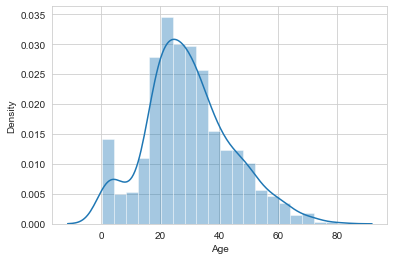

In [253]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["Age"])

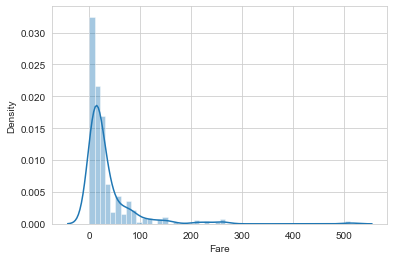

In [254]:
sns.distplot(copy["Fare"])


In [255]:
#the median will be an acceptable value to place in the NaN cells
training["Age"].fillna(training["Age"].median(), inplace = True)
testing["Age"].fillna(testing["Age"].median(), inplace = True) 
training["Embarked"].fillna("S", inplace = True)
testing["Fare"].fillna(testing["Fare"].median(), inplace = True)

null_table(training, testing)

Training Data Frame
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64
 
Testing Data Frame
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [256]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


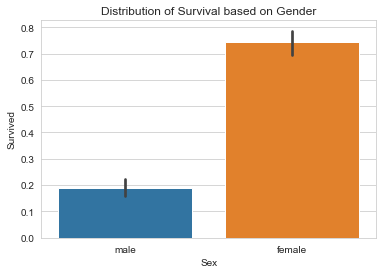

Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [257]:
#can ignore the testing set for now
sns.barplot(x="Sex", y="Survived", data=training)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = training[training.Sex == "female"]["Survived"].sum()
total_survived_males = training[training.Sex == "male"]["Survived"].sum()

print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

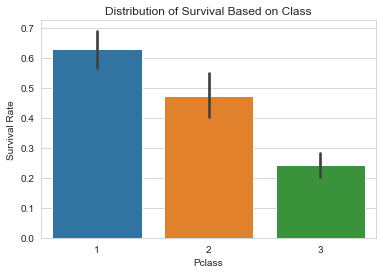

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [258]:
sns.barplot(x="Pclass", y="Survived", data=training)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = training[training.Pclass == 1]["Survived"].sum()
total_survived_two = training[training.Pclass == 2]["Survived"].sum()
total_survived_three = training[training.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

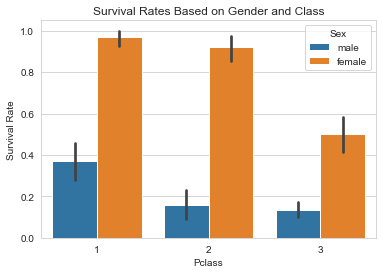

In [259]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

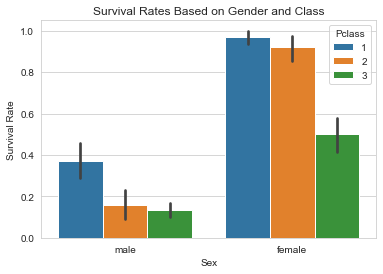

In [260]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=training)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

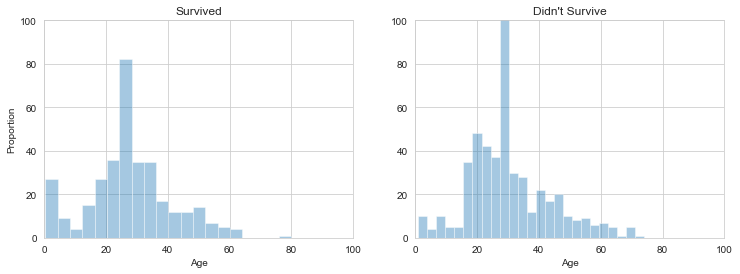

In [261]:
survived_ages = training[training.Survived == 1]["Age"]
not_survived_ages = training[training.Survived == 0]["Age"]
plt.subplot(1, 2, 1)
sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)
sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

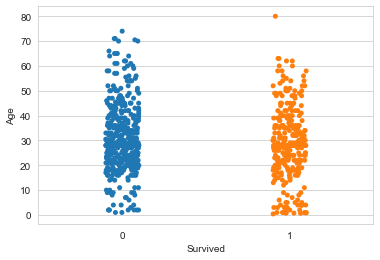

In [262]:
sns.stripplot(x="Survived", y="Age", data=training, jitter=True)

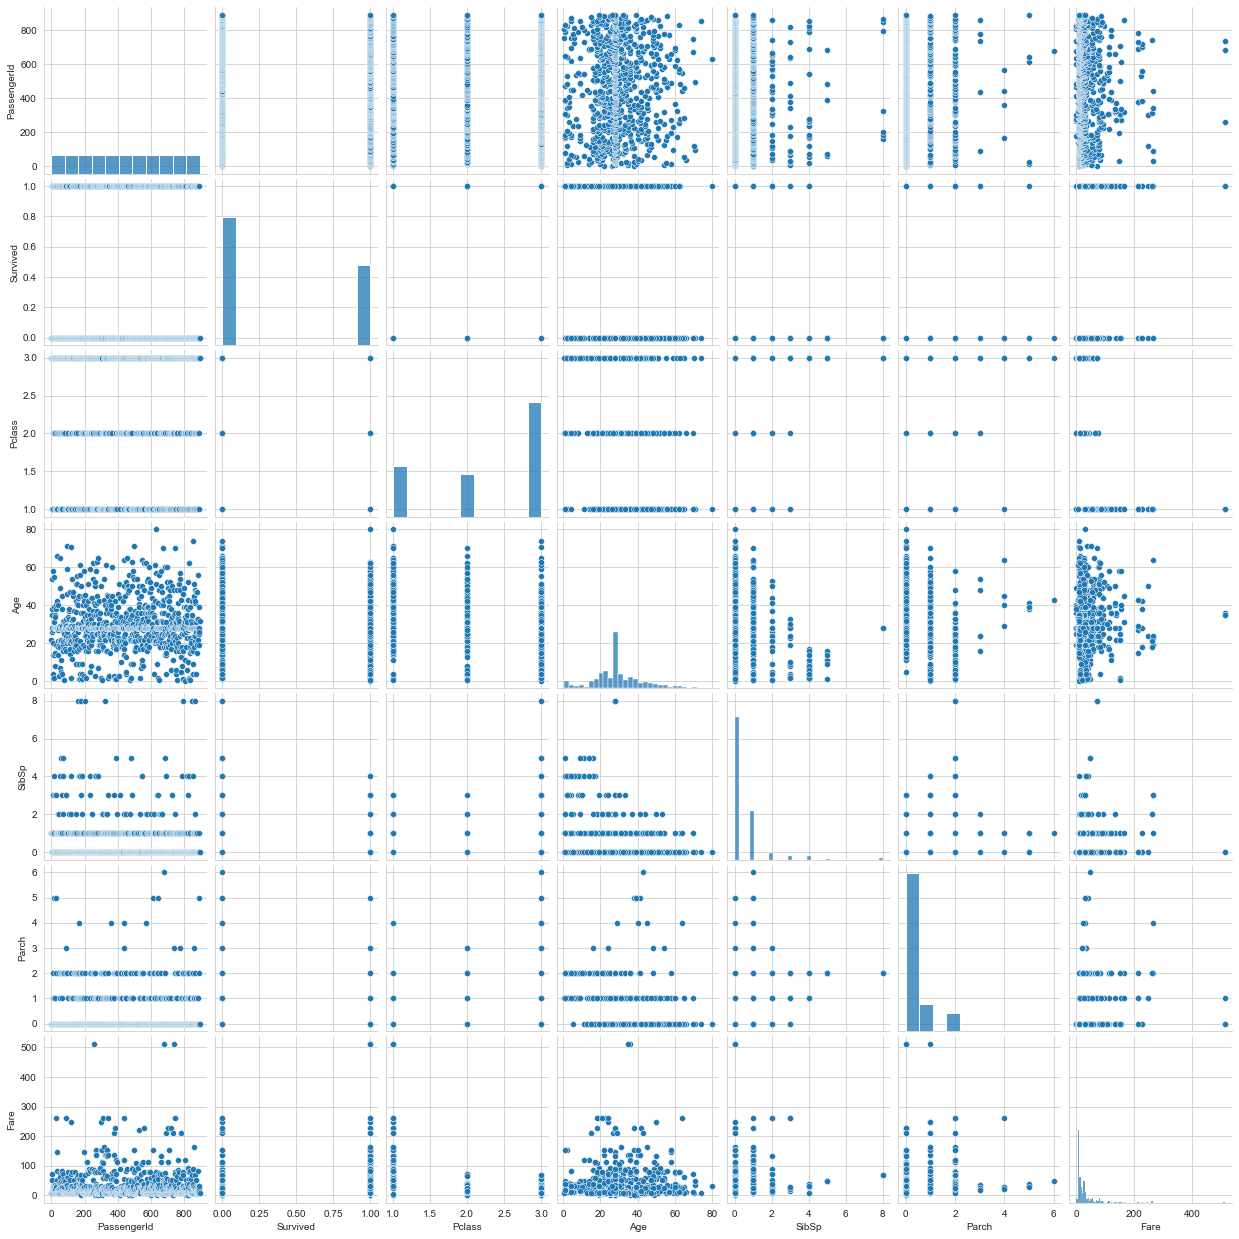

In [263]:
sns.pairplot(training)

In [264]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,8.6542,S
444,445,1,3,"Johannesen-Bratthammer, Mr. Bernt",male,28.0,0,0,8.1125,S
392,393,0,3,"Gustafsson, Mr. Johan Birger",male,28.0,2,0,7.9250,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,26.0000,S
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,26.0000,S


In [265]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
190,1082,2,"Angle, Mr. William A",male,34.0,1,0,26.0000,S
315,1207,3,"Hagardon, Miss. Kate",female,17.0,0,0,7.7333,Q
389,1281,3,"Palsson, Master. Paul Folke",male,6.0,3,1,21.0750,S
391,1283,1,"Lines, Mrs. Ernest H (Elizabeth Lindsey James)",female,51.0,0,1,39.4000,S
41,933,1,"Franklin, Mr. Thomas Parham",male,27.0,0,0,26.5500,S


In [266]:
set(training["Embarked"])

{'C', 'Q', 'S'}

In [267]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_sex.fit(training["Sex"])

encoded_sex_training = le_sex.transform(training["Sex"])
training["Sex"] = encoded_sex_training
encoded_sex_testing = le_sex.transform(testing["Sex"])
testing["Sex"] = encoded_sex_testing

le_embarked = LabelEncoder()
le_embarked.fit(training["Embarked"])

encoded_embarked_training = le_embarked.transform(training["Embarked"])
training["Embarked"] = encoded_embarked_training
encoded_embarked_testing = le_embarked.transform(testing["Embarked"])
testing["Embarked"] = encoded_embarked_testing

#Here's how to do it manually in Python without packages
"""
training.loc[training["Sex"] == "male", "Sex"] = 0
training.loc[training["Sex"] == "female", "Sex"] = 1

training.loc[training["Embarked"] == "S", "Embarked"] = 0
training.loc[training["Embarked"] == "C", "Embarked"] = 1
training.loc[training["Embarked"] == "Q", "Embarked"] = 2

testing.loc[testing["Sex"] == "male", "Sex"] = 0
testing.loc[testing["Sex"] == "female", "Sex"] = 1

testing.loc[testing["Embarked"] == "S", "Embarked"] = 0
testing.loc[testing["Embarked"] == "C", "Embarked"] = 1
testing.loc[testing["Embarked"] == "Q", "Embarked"] = 2
"""

'\ntraining.loc[training["Sex"] == "male", "Sex"] = 0\ntraining.loc[training["Sex"] == "female", "Sex"] = 1\n\ntraining.loc[training["Embarked"] == "S", "Embarked"] = 0\ntraining.loc[training["Embarked"] == "C", "Embarked"] = 1\ntraining.loc[training["Embarked"] == "Q", "Embarked"] = 2\n\ntesting.loc[testing["Sex"] == "male", "Sex"] = 0\ntesting.loc[testing["Sex"] == "female", "Sex"] = 1\n\ntesting.loc[testing["Embarked"] == "S", "Embarked"] = 0\ntesting.loc[testing["Embarked"] == "C", "Embarked"] = 1\ntesting.loc[testing["Embarked"] == "Q", "Embarked"] = 2\n'

In [268]:
training.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
442,443,0,3,"Petterson, Mr. Johan Emil",1,25.0,1,0,7.7750,2
641,642,1,1,"Sagesser, Mlle. Emma",0,24.0,0,0,69.3000,0
178,179,0,2,"Hale, Mr. Reginald",1,30.0,0,0,13.0000,2
625,626,0,1,"Sutton, Mr. Frederick",1,61.0,0,0,32.3208,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,2


In [269]:
testing.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
57,949,3,"Abelseth, Mr. Olaus Jorgensen",1,25.0,0,0,7.6500,2
293,1185,1,"Dodge, Dr. Washington",1,53.0,1,1,81.8583,2
191,1083,1,"Salomon, Mr. Abraham L",1,27.0,0,0,26.0000,2
396,1288,3,"Colbert, Mr. Patrick",1,24.0,0,0,7.2500,1
122,1014,1,"Schabert, Mrs. Paul (Emma Mock)",0,35.0,1,0,57.7500,0


In [270]:
training["FamSize"] = training["SibSp"] + training["Parch"] + 1
testing["FamSize"] = testing["SibSp"] + testing["Parch"] + 1

In [271]:
training["IsAlone"] = training.FamSize.apply(lambda x: 1 if x == 1 else 0)
testing["IsAlone"] = testing.FamSize.apply(lambda x: 1 if x == 1 else 0)

In [272]:
for name in training["Name"]:
    training["Title"] = training["Name"].str.extract("([A-Za-z]+)\.",expand=True)
    
for name in testing["Name"]:
    testing["Title"] = testing["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [273]:
training.head() #Title column added

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,1,Mr


In [274]:
titles = set(training["Title"]) #making it a set gets rid of all duplicates
print(titles)

{'Rev', 'Mme', 'Col', 'Sir', 'Major', 'Mr', 'Jonkheer', 'Don', 'Ms', 'Mlle', 'Lady', 'Capt', 'Master', 'Countess', 'Dr', 'Miss', 'Mrs'}


In [275]:
title_list = list(training["Title"])
frequency_titles = []

for i in titles:
    frequency_titles.append(title_list.count(i))
    
print(frequency_titles)

[6, 1, 2, 1, 2, 517, 1, 1, 1, 2, 1, 1, 40, 1, 7, 182, 125]


In [276]:
titles = list(titles)

title_dataframe = pd.DataFrame({
    "Titles" : titles,
    "Frequency" : frequency_titles
})

print(title_dataframe)

      Titles  Frequency
0        Rev          6
1        Mme          1
2        Col          2
3        Sir          1
4      Major          2
5         Mr        517
6   Jonkheer          1
7        Don          1
8         Ms          1
9       Mlle          2
10      Lady          1
11      Capt          1
12    Master         40
13  Countess          1
14        Dr          7
15      Miss        182
16       Mrs        125


In [277]:
title_replacements = {"Mlle": "Other", "Major": "Other", "Col": "Other", "Sir": "Other", "Don": "Other", "Mme": "Other",
          "Jonkheer": "Other", "Lady": "Other", "Capt": "Other", "Countess": "Other", "Ms": "Other", "Dona": "Other"}

training.replace({"Title": title_replacements}, inplace=True)
testing.replace({"Title": title_replacements}, inplace=True)

le_title = LabelEncoder()
le_title.fit(training["Title"])

encoded_title_training = le_title.transform(training["Title"])
training["Title"] = encoded_title_training
encoded_title_testing = le_title.transform(testing["Title"])
testing["Title"] = encoded_title_testing

#Again, here's how to do it manually
"""
training.loc[training["Title"] == "Miss", "Title"] = 0
training.loc[training["Title"] == "Mr", "Title"] = 1
training.loc[training["Title"] == "Mrs", "Title"] = 2
training.loc[training["Title"] == "Master", "Title"] = 3
training.loc[training["Title"] == "Dr", "Title"] = 4
training.loc[training["Title"] == "Rev", "Title"] = 5
training.loc[training["Title"] == "Other", "Title"] = 6

testing.loc[testing["Title"] == "Miss", "Title"] = 0
testing.loc[testing["Title"] == "Mr", "Title"] = 1
testing.loc[testing["Title"] == "Mrs", "Title"] = 2
testing.loc[testing["Title"] == "Master", "Title"] = 3
testing.loc[testing["Title"] == "Dr", "Title"] = 4
testing.loc[testing["Title"] == "Rev", "Title"] = 5
testing.loc[testing["Title"] == "Other", "Title"] = 6
"""

'\ntraining.loc[training["Title"] == "Miss", "Title"] = 0\ntraining.loc[training["Title"] == "Mr", "Title"] = 1\ntraining.loc[training["Title"] == "Mrs", "Title"] = 2\ntraining.loc[training["Title"] == "Master", "Title"] = 3\ntraining.loc[training["Title"] == "Dr", "Title"] = 4\ntraining.loc[training["Title"] == "Rev", "Title"] = 5\ntraining.loc[training["Title"] == "Other", "Title"] = 6\n\ntesting.loc[testing["Title"] == "Miss", "Title"] = 0\ntesting.loc[testing["Title"] == "Mr", "Title"] = 1\ntesting.loc[testing["Title"] == "Mrs", "Title"] = 2\ntesting.loc[testing["Title"] == "Master", "Title"] = 3\ntesting.loc[testing["Title"] == "Dr", "Title"] = 4\ntesting.loc[testing["Title"] == "Rev", "Title"] = 5\ntesting.loc[testing["Title"] == "Other", "Title"] = 6\n'

In [278]:
training.drop("Name", axis = 1, inplace = True)
testing.drop("Name", axis = 1, inplace = True)

In [279]:
training.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
333,334,0,3,1,16.0,2,0,18.0000,2,3,0,3
647,648,1,1,1,56.0,0,0,35.5000,0,1,1,5
315,316,1,3,0,26.0,0,0,7.8542,2,1,1,2
202,203,0,3,1,34.0,0,0,6.4958,2,1,1,3
422,423,0,3,1,29.0,0,0,7.8750,2,1,1,3


In [280]:
corr = training.corr()
corr.head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013128,-0.040143,0.057462,0.063978
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675,0.016639,-0.203367,-0.060604
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098,0.065997,0.135207,-0.132099
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262,-0.200988,0.303646,0.023909
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754,-0.245619,0.171647,0.413702
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230,0.890712,-0.584471,-0.208276
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798,0.783111,-0.583398,-0.096841
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719,0.217138,-0.271832,-0.026888
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000,0.066516,0.063532,0.006915
FamSize,-0.040143,0.016639,0.065997,-0.200988,-0.245619,0.890712,0.783111,0.217138,0.066516,1.000000,-0.690922,-0.190730


In [281]:
testing.sample(5)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
218,1110,1,0,50.0,1,1,211.5000,0,3,0,4
247,1139,2,1,42.0,1,1,32.5000,2,3,0,3
394,1286,3,1,29.0,3,1,22.0250,2,5,0,3
334,1226,3,1,27.0,0,0,7.8958,2,1,1,3
283,1175,3,0,9.0,1,1,15.2458,0,3,0,2


In [282]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#We need to reshape our data since the Scaler takes in arrays
ages_train = np.array(training["Age"]).reshape(-1, 1)
fares_train = np.array(training["Fare"]).reshape(-1, 1)
ages_test = np.array(testing["Age"]).reshape(-1, 1)
fares_test = np.array(testing["Fare"]).reshape(-1, 1)

training["Age"] = scaler.fit_transform(ages_train)
training["Fare"] = scaler.fit_transform(fares_train)
testing["Age"] = scaler.fit_transform(ages_test)
testing["Fare"] = scaler.fit_transform(fares_test)

#You can try with MinMaxScaler as well to see how it performs in comparison, just replace StandardScaler with MinMaxScaler

In [283]:
training.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,1,0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,2,1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,1,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,4,1,1,0,0.433312,1,0,0.420730,2,2,0,4
4,5,0,3,1,0.433312,0,0,-0.486337,2,1,1,3


In [284]:
testing.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,892,3,1,0.386231,0,0,-0.497413,1,1,1,3
1,893,3,0,1.371370,1,0,-0.512278,2,2,0,4
2,894,2,1,2.553537,0,0,-0.464100,1,1,1,3
3,895,3,1,-0.204852,0,0,-0.482475,2,1,1,3
4,896,3,0,-0.598908,1,1,-0.417492,2,3,0,4


In [285]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [286]:
from sklearn.metrics import make_scorer, accuracy_score 

In [287]:
from sklearn.model_selection import GridSearchCV

In [288]:
X_train = training.drop(labels=["PassengerId", "Survived"], axis=1) #define training features set
y_train = training["Survived"] #define training label set
X_test = testing.drop("PassengerId", axis=1) #define testing features set
#we don't have y_test, that is what we're trying to predict with our model

In [289]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,IsAlone,Title
0,3,1,-0.565736,1,0,-0.502445,2,2,0,3
1,1,0,0.663861,1,0,0.786845,0,2,0,4
2,3,0,-0.258337,0,0,-0.488854,2,1,1,2
3,1,0,0.433312,1,0,0.420730,2,2,0,4
4,3,1,0.433312,0,0,-0.486337,2,1,1,3


In [290]:
from sklearn.model_selection import train_test_split #to create validation data set

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0) #X_valid and y_valid are the validation sets

In [291]:
svc_clf = SVC() 

parameters_svc = {"kernel": ["rbf", "linear"], "probability": [True, False], "verbose": [True, False]}

grid_svc = GridSearchCV(svc_clf, parameters_svc, scoring=make_scorer(accuracy_score))
grid_svc.fit(X_training, y_training)

svc_clf = grid_svc.best_estimator_

svc_clf.fit(X_training, y_training)
pred_svc = svc_clf.predict(X_valid)
acc_svc = accuracy_score(y_valid, pred_svc)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [292]:
print("The Score for SVC is: " + str(acc_svc))

The Score for SVC is: 0.8212290502793296


In [293]:
linsvc_clf = LinearSVC()

parameters_linsvc = {"multi_class": ["ovr", "crammer_singer"], "fit_intercept": [True, False], "max_iter": [100, 500, 1000, 1500]}

grid_linsvc = GridSearchCV(linsvc_clf, parameters_linsvc, scoring=make_scorer(accuracy_score))
grid_linsvc.fit(X_training, y_training)

linsvc_clf = grid_linsvc.best_estimator_

linsvc_clf.fit(X_training, y_training)
pred_linsvc = linsvc_clf.predict(X_valid)
acc_linsvc = accuracy_score(y_valid, pred_linsvc)

print("The Score for LinearSVC is: " + str(acc_linsvc))

The Score for LinearSVC is: 0.7932960893854749


In [294]:
rf_clf = RandomForestClassifier()

parameters_rf = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], "criterion": ["gini", "entropy"], "max_features": ["auto", "sqrt", "log2"], 
                 "max_depth": [2, 3, 5, 10], "min_samples_split": [2, 3, 5, 10]}

grid_rf = GridSearchCV(rf_clf, parameters_rf, scoring=make_scorer(accuracy_score))
grid_rf.fit(X_training, y_training)

rf_clf = grid_rf.best_estimator_

rf_clf.fit(X_training, y_training)
pred_rf = rf_clf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)

print("The Score for Random Forest is: " + str(acc_rf))

The Score for Random Forest is: 0.8268156424581006


In [295]:
logreg_clf = LogisticRegression()

parameters_logreg = {"penalty": ["l2"], "fit_intercept": [True, False], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                     "max_iter": [50, 100, 200], "warm_start": [True, False]}

grid_logreg = GridSearchCV(logreg_clf, parameters_logreg, scoring=make_scorer(accuracy_score))
grid_logreg.fit(X_training, y_training)

logreg_clf = grid_logreg.best_estimator_

logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print("The Score for Logistic Regression is: " + str(acc_logreg))

The Score for Logistic Regression is: 0.8044692737430168


In [296]:
knn_clf = KNeighborsClassifier()

parameters_knn = {"n_neighbors": [3, 5, 10, 15], "weights": ["uniform", "distance"], "algorithm": ["auto", "ball_tree", "kd_tree"],
                  "leaf_size": [20, 30, 50]}

grid_knn = GridSearchCV(knn_clf, parameters_knn, scoring=make_scorer(accuracy_score))
grid_knn.fit(X_training, y_training)

knn_clf = grid_knn.best_estimator_

knn_clf.fit(X_training, y_training)
pred_knn = knn_clf.predict(X_valid)
acc_knn = accuracy_score(y_valid, pred_knn)

print("The Score for KNeighbors is: " + str(acc_knn))

The Score for KNeighbors is: 0.7653631284916201


In [297]:
gnb_clf = GaussianNB()

parameters_gnb = {}

grid_gnb = GridSearchCV(gnb_clf, parameters_gnb, scoring=make_scorer(accuracy_score))
grid_gnb.fit(X_training, y_training)

gnb_clf = grid_gnb.best_estimator_

gnb_clf.fit(X_training, y_training)
pred_gnb = gnb_clf.predict(X_valid)
acc_gnb = accuracy_score(y_valid, pred_gnb)

print("The Score for Gaussian NB is: " + str(acc_gnb))

The Score for Gaussian NB is: 0.776536312849162


In [298]:
dt_clf = DecisionTreeClassifier()

parameters_dt = {"criterion": ["gini", "entropy"], "splitter": ["best", "random"], "max_features": ["auto", "sqrt", "log2"]}

grid_dt = GridSearchCV(dt_clf, parameters_dt, scoring=make_scorer(accuracy_score))
grid_dt.fit(X_training, y_training)

dt_clf = grid_dt.best_estimator_

dt_clf.fit(X_training, y_training)
pred_dt = dt_clf.predict(X_valid)
acc_dt = accuracy_score(y_valid, pred_dt)

print("The Score for Decision Tree is: " + str(acc_dt))

The Score for Decision Tree is: 0.7877094972067039


In [299]:
# from xgboost import XGBClassifier

# xg_clf = XGBClassifier()

# parameters_xg = {"objective" : ["reg:linear"], "n_estimators" : [5, 10, 15, 20]}

# grid_xg = GridSearchCV(xg_clf, parameters_xg, scoring=make_scorer(accuracy_score))
# grid_xg.fit(X_training, y_training)

# xg_clf = grid_xg.best_estimator_

# xg_clf.fit(X_training, y_training)
# pred_xg = xg_clf.predict(X_valid)
# acc_xg = accuracy_score(y_valid, pred_xg)

# print("The Score for XGBoost is: " + str(acc_xg))

In [300]:
# model_performance = pd.DataFrame({
#     "Model": ["SVC", "Linear SVC", "Random Forest", 
#               "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
#               "Decision Tree", "XGBClassifier"],
#     "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
#               acc_logreg, acc_knn, acc_gnb, acc_dt, acc_xg]
# })
model_performance = pd.DataFrame({
    "Model": ["SVC", "Linear SVC", "Random Forest", 
              "Logistic Regression", "K Nearest Neighbors", "Gaussian Naive Bayes",  
              "Decision Tree"],
    "Accuracy": [acc_svc, acc_linsvc, acc_rf, 
              acc_logreg, acc_knn, acc_gnb, acc_dt]
})

model_performance.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy
2,Random Forest,0.826816
0,SVC,0.821229
3,Logistic Regression,0.804469
1,Linear SVC,0.793296
6,Decision Tree,0.787709
5,Gaussian Naive Bayes,0.776536
4,K Nearest Neighbors,0.765363


In [301]:

svc_clf.fit(X_train, y_train)

[LibSVM]

SVC(probability=True, verbose=True)

In [302]:
submission_predictions = svc_clf.predict(X_test)

In [303]:
submission = pd.DataFrame({
        "PassengerId": testing["PassengerId"],
        "Survived": submission_predictions
    })

submission.to_csv("titanic.csv", index=False)
print(submission.shape)

(418, 2)
